In [1]:
import pandas as pd

## Listings: including full descriptions and average review score
##Reviews: including unique id for each reviewer and detailed comments
##Calendar: including listing id and the price and availability for that day

In [2]:
listing=pd.read_csv("C:\\Users\\176288724\\Downloads\\archiveds\\listings.csv")

In [29]:
calendar=pd.read_csv("C:\\Users\\176288724\\Downloads\\archiveds\\calendar.csv")

In [4]:
reviews=pd.read_csv("C:\\Users\\176288724\\Downloads\\archiveds\\reviews.csv")

In [20]:
listings_subset = listing[['id', 'name','city','host_response_time', 'host_response_rate','host_acceptance_rate', 'accommodates', 'bathrooms', 
                               'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit','cleaning_fee',
                              'extra_people', 'minimum_nights', 'review_scores_rating', 'instant_bookable', 'zipcode']]

In [21]:
data=pd.merge(listings_subset,calander,left_on='id',right_on='listing_id')

In [22]:
data.head(2)

,id,name,city,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode,listing_id,date,available,price_y
0,241032,Stylish Queen Anne Apartment,Seattle,within a few hours,96%,100%,4,1.0,1.0,1.0,...,NaN,$5.00,1,95.0,f,98119,241032,2016-01-04,t,$85.00
1,241032,Stylish Queen Anne Apartment,Seattle,within a few hours,96%,100%,4,1.0,1.0,1.0,...,NaN,$5.00,1,95.0,f,98119,241032,2016-01-05,t,$85.00


In [39]:
##Filtering room which are available### 

In [23]:
result=data[data.available=='t']

In [24]:
result['month_year'] = pd.to_datetime(result['date']).dt.to_period('M')

C:\Users\176288724\AppData\Local\Temp\ipykernel_68460\833020895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['month_year'] = pd.to_datetime(result['date']).dt.to_period('M')


In [25]:
result.columns

Index(['id', 'name', 'city', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price_x', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'minimum_nights',
       'review_scores_rating', 'instant_bookable', 'zipcode', 'listing_id',
       'date', 'available', 'price_y', 'month_year'],
      dtype='object')

In [26]:
##Group By Hotel Name by City####
result.groupby(['name','city','month_year'])['available'].count()

name                                 city     month_year
 BY Downtown*Universities*Hospitals  Seattle  2016-01       28
                                              2016-02       29
                                              2016-03       31
                                              2016-04       30
                                              2016-05       31
                                                            ..
• West Seattle Crash Pad •           Seattle  2016-09       30
                                              2016-10       31
                                              2016-11       30
                                              2016-12       31
                                              2017-01        2
Name: available, Length: 35928, dtype: int64

91.93443744411826

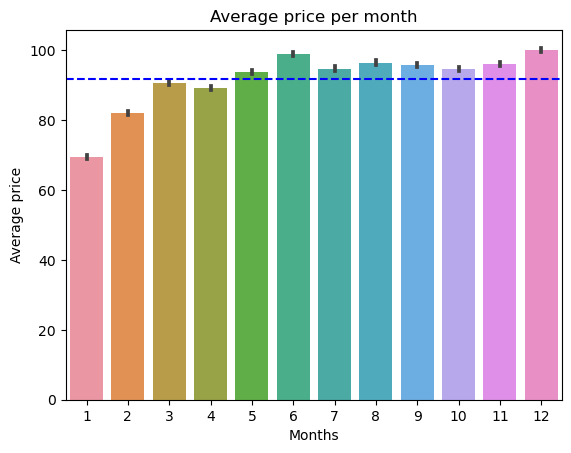

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
Analyze the price over period of time
"""
sns.barplot(data = calendar, x ='month', y = 'price')
plt.ylabel('Average price')
plt.xlabel('Months')
plt.title('Average price per month');
plt.axhline(calendar.price.mean(), linestyle='--', color='blue');

calendar.price.mean()



In [31]:
replace_decimal = (lambda x:x[:-3].replace(',','.') if type(x) is str else x)
remove_dollar = (lambda x :x.replace('$','') if type(x) is str else x)

calendar['price'] = calendar.price.apply(replace_decimal)
calendar['price'] = calendar.price.apply(remove_dollar)
calendar['price'] = calendar['price'].astype(float)
calendar['price'].fillna(0,inplace=True)
calendar['listing_id'] = calendar.listing_id.astype(str)
calendar['date'] = pd.to_datetime(calendar['date'])

### Adding Columns date month and year 
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['date']= pd.DatetimeIndex(calendar['date']).date
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype    
---  ------      --------------    -----    
 0   listing_id  1393570 non-null  object   
 1   date        1393570 non-null  object   
 2   available   1393570 non-null  object   
 3   price       1393570 non-null  float64  
 4   month       1393570 non-null  int64    
 5   year        1393570 non-null  int64    
 6   month_year  1393570 non-null  period[M]
dtypes: float64(1), int64(2), object(3), period[M](1)
memory usage: 74.4+ MB


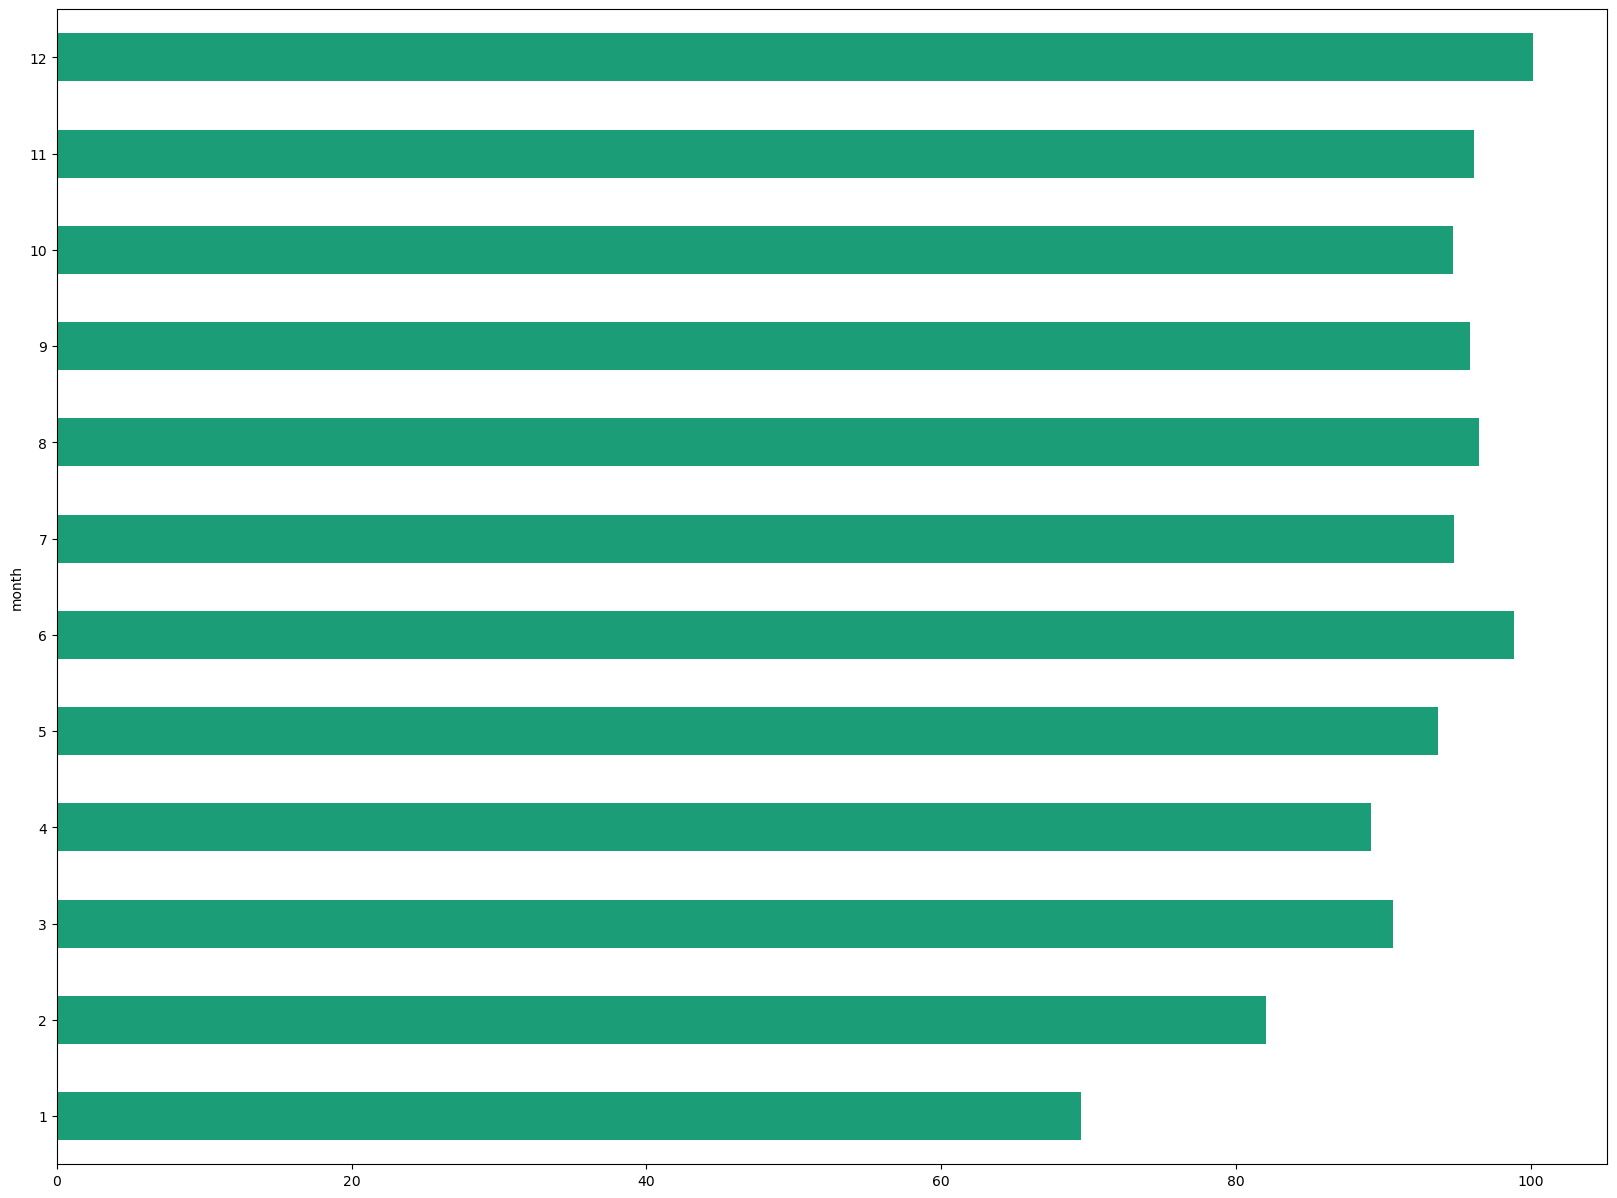

In [32]:
"""
Bar Diagram to depict the busiest time of the year.
"""
busy_time = calendar.groupby('month')['price'].mean()
busy_time.plot(kind ='barh',figsize =(20,15), colormap="Dark2");